### MIMICS-CN, global results
- reads in MIMICS results from Melannie's test simulations
- /project/tss/bgc01/melannie/git_CASACLM/biogeochem_testbed_1.1/GRID_CN/MIMICS/OUTPUT_CN/SPIN
- compares to C-only version
- /project/tss/wwieder/CASACLM/GRID/OUTPUT_GRID_CRU_NCEP/CASACNP_post_ADSPIN_c &

- plots zonal distributions of fluxes

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy 
import utils
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# some resources for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
%matplotlib inline

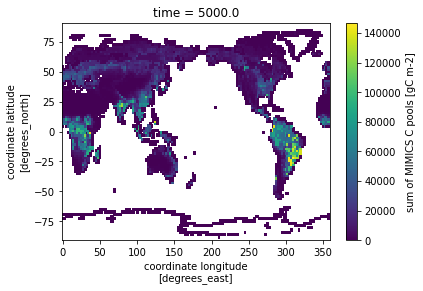

In [27]:
dINmim = '/project/tss/bgc01/melannie/git_CASACLM/biogeochem_testbed_1.1/GRID_CN/MIMICS/OUTPUT_CN/SPIN/mimics_pool_flux_5000.nc'
dINmimVeg = '/project/tss/bgc01/melannie/git_CASACLM/biogeochem_testbed_1.1/GRID_CN/MIMICS/OUTPUT_CN/SPIN/casaclm_pool_flux_5000.nc'
#dINcas   = '/project/tss/wwieder/CASACLM/GRID/OUTPUT_GRID_CRU_NCEP/CASACNP_HIST/casaclm_pool_flux_2010_daily.nc'
dsMIM  = utils.time_set_mid(xr.open_mfdataset(dINmim, decode_times=True, combine='by_coords'), 'time')
dsMIMveg  = utils.time_set_mid(xr.open_mfdataset(dINmimVeg, decode_times=True, combine='by_coords'), 'time')
dsMIM['cTOT'] = dsMIM['cLITm']+dsMIM['cLITs']+dsMIM['cMICr']+dsMIM['cMICk']+ \
                dsMIM['cSOMa']+dsMIM['cSOMc']+dsMIM['cSOMp']
dsMIM['cTOT'].attrs['long_name'] = 'sum of MIMICS C pools'
dsMIM['cTOT'].attrs['units'] = dsMIM['cLITm'].attrs['units']
dsMIM['nTOT'] = dsMIM['nLITm']+dsMIM['nLITs']+dsMIM['nMICr']+dsMIM['nMICk']+ \
                dsMIM['nSOMa']+dsMIM['nSOMc']+dsMIM['nSOMp']
dsMIM['cnTOT']= dsMIM['cTOT'] / dsMIM['nTOT']
dsMIM['cTOT'].plot();

### All soil C is in the tropics
### total C:N is very low

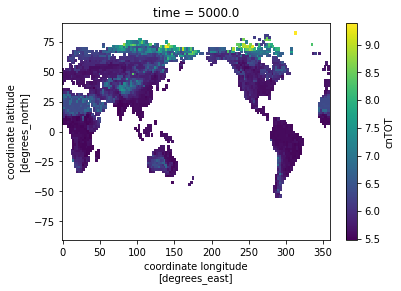

In [3]:
dsMIM['cnTOT'].plot();


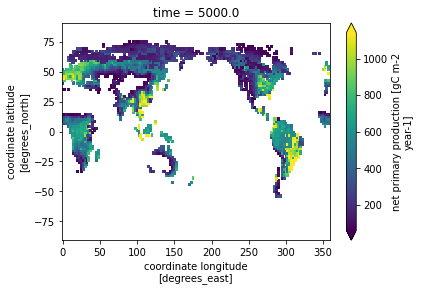

In [4]:
dsMIMveg['cnpp'].where(dsMIMveg.cnpp>50).plot(robust=True);


## Define function for printing global sum

In [29]:
def globalSum ( varIn, area=dsMIM.landarea *1e6, time=1, conversion=1e-15, units=None ):
    "Global weighted sum of fluxes & states"
    temp = varIn * area 
    temp = temp.sum(dim=('lat','lon')) * conversion
    print(varIn.attrs['long_name']+' '+str(np.round(temp.values,0))+' Pg C')
    #temp.attrs['long_name']= varIn.attrs['long_name']
    #temp.attrs['units']= units
    #temp = temp.assign_coords({'time': (ds.time)})
    #return (temp)

In [30]:
globalSum(dsMIMveg['cgpp'])
globalSum(dsMIMveg['cnpp'])
globalSum(dsMIM['cTOT'])

gross primary production [119.] Pg C
net primary production [43.] Pg C
sum of MIMICS C pools [2690.] Pg C


In [6]:
ConlyIN = '/project/tss/wwieder/CASACLM/GRID/OUTPUT_GRID_CRU_NCEP/MIMICS_SPIN_b/'
Ccas = ConlyIN+'casaclm_pool_flux_9000_9980.nc'
Cmim = ConlyIN+'mimics_pool_flux_9000_9980.nc'

'/project/tss/wwieder/CASACLM/GRID/OUTPUT_GRID_CRU_NCEP/MIMICS_SPIN_b/mimics_pool_flux_9000_9980.nc'

In [32]:
dsMIMCsoi  = utils.time_set_mid(xr.open_mfdataset(Cmim, decode_times=True, combine='by_coords'), 'time')
dsCASCveg  = utils.time_set_mid(xr.open_mfdataset(Ccas, decode_times=True, combine='by_coords'), 'time')
dsMIMCsoi['cTOT'] = dsMIMCsoi['cLITm']+dsMIMCsoi['cLITs']+dsMIMCsoi['cMICr']+dsMIMCsoi['cMICk']+ \
                dsMIMCsoi['cSOMa']+dsMIMCsoi['cSOMc']+dsMIMCsoi['cSOMp']
dsMIMCsoi['cTOT'].attrs['long_name'] = 'sum of MIMICS C pools'
dsMIMCsoi['cTOT'].attrs['units'] = dsMIMCsoi['cLITm'].attrs['units']

In [33]:
globalSum(dsCASCveg['cgpp'].isel(time=0))
globalSum(dsCASCveg['cnpp'].isel(time=0))
globalSum(dsMIMCsoi['cTOT'].isel(time=0))

gross primary production 119.0 Pg C
net primary production 49.0 Pg C
sum of MIMICS C pools 1470.0 Pg C


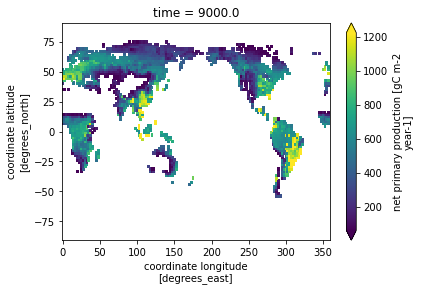

In [34]:
dsCASCveg['cnpp'].where(dsCASCveg['cnpp']>50).isel(time=0).plot(robust=True);

### difference in NPP (CN-C)
- most notably in boreal forests.
- somewhat int tropcs

NPP difference (CN-C) [-6.] Pg C


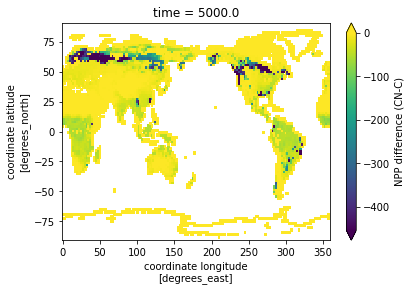

In [37]:
dNPP = dsMIMveg['cnpp'] - dsCASCveg['cnpp'].isel(time=0)
dNPP.attrs['long_name'] = 'NPP difference (CN-C)'
globalSum(dNPP)
dNPP.plot(robust=True);

In [ ]:
dSOC = dsMIM['cTOT'] - dsMIMCsoi['cTOT'].isel(time=0)
dSOC.attrs['long_name'] = 'total SOC difference (CN-C)'
globalSum(dSOC)
dSOC.plot(robust=True);

In [5]:
ann_ds = ds.sum(dim='time')  #sum over time for annual fluxes
var  =  ['cHresp','cresp','cnpp', 'cgpp']
varLong  =  ['Rh_mim','Rh_cas','npp', 'gpp']
for i in range(len(var)):
    ann_ds.get(var[i]).attrs['units'] = 'gC m-2 y-1'

ann_ds.cnpp.plot(robust=True)

# sum up fluxes
ann_flux = ann_ds * ann_ds.landarea *1e6
for i in range(len(var)):
    ann_flux.get(var[i]).attrs['units'] = 'gC y-1'

NameError: name 'ds' is not defined

56.325317811240964


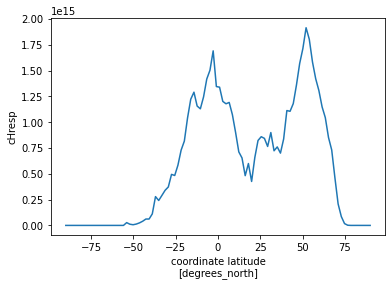

In [5]:
print(ann_flux.get(var[0]).values.sum()*1e-15) #convert gC to PgC
zon_sum = ann_flux.sum(dim='lon')
zon_sum.cHresp.plot();

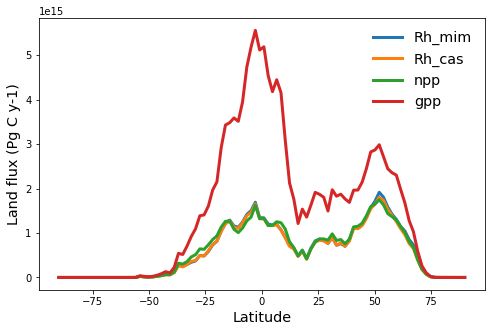

In [6]:
plt.figure(figsize=[8,5])
#plt.ylabel('Change Global Land C ('+g585y.units+')', fontsize='x-large')
for i in range(len(var)):
    plt.plot(zon_sum.lat, zon_sum.get(var[i]), lw=3)

plt.legend(labels=(varLong), frameon = False, fontsize='x-large')
plt.ylabel('Land flux (Pg C y-1)', fontsize='x-large')
plt.xlabel('Latitude', fontsize='x-large');
#plt.hlines(y=0, xmin=1850, xmax=2300, linestyles='dashed')
#plt.title('CESM2-WACCM Land C uptake', fontsize='x-large');
